In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
from tinydb import TinyDB

In [2]:
# load the calculated data and convert into panda frame
db = TinyDB(os.path.join('..', 'data', 'calculated-data.json'))
data = list(db.all())
df = pd.DataFrame(data)
df

,nicss_five_ring_above,nicss_five_ring_below,nicss_six_ring_above,nicss_six_ring_below,nicst_five_ring_above,nicst_five_ring_below,nicst_six_ring_above,nicst_six_ring_below,nx,ny,td_singlet,td_triplet,tda_singlet,tda_triplet,title,x_sub,y_sub,z_sub
0,2.21325,2.56835,2.32160,2.50220,5.70330,5.79790,1.06725,0.85290,1.0,1.0,2.5140,1.4047,2.6622,1.5727,ciba_nx-1_ny-1_x-nitro_y-nitro_z-amine,nitro,nitro,amine
1,2.14890,2.67220,1.90300,2.34980,6.23110,6.48100,0.63915,0.13230,1.0,1.0,2.0355,0.9652,2.2716,1.1458,ciba_nx-1_ny-1_x-nitro_y-nitro_z-cyano,nitro,nitro,cyano
2,2.58485,2.25165,2.41940,2.23730,6.21025,6.09700,0.59450,0.82730,1.0,1.0,2.4915,1.3209,2.5362,1.5063,ciba_nx-1_ny-1_x-nitro_y-nitro_z-hydroxyl,nitro,nitro,hydroxyl
3,2.24680,2.63875,2.17080,2.40700,6.80195,6.98555,0.52830,0.21865,1.0,1.0,2.4166,1.1964,2.6661,1.3955,ciba_nx-1_ny-1_x-nitro_y-nitro_z-fluoro,nitro,nitro,fluoro
4,2.25190,2.37715,2.05345,2.18060,6.41755,6.48435,0.61170,0.48855,1.0,1.0,2.2359,1.1094,2.4739,1.2919,ciba_nx-1_ny-1_x-nitro_y-nitro_z-chloro,nitro,nitro,chloro
5,2.32350,2.66650,2.25825,2.54975,6.83840,6.96655,0.42770,0.07315,1.0,1.0,2.3477,1.1612,2.5886,1.3584,ciba_nx-1_ny-1_x-nitro_y-nitro_z-bromo,nitro,nitro,bromo
6,2.23115,2.59685,2.27365,2.46840,6.86735,7.03245,0.48440,0.23090,1.0,1.0,2.3655,1.1661,2.6049,1.3660,ciba_nx-1_ny-1_x-nitro_y-nitro_z-,nitro,nitro,None
7,2.21660,1.60875,2.81800,2.43950,5.10325,4.75555,0.63625,0.95265,1.0,1.0,1.8918,1.0104,2.0584,1.1524,ciba_nx-1_ny-1_x-nitro_y-amine_z-nitro,nitro,amine,nitro
8,1.31545,1.72890,2.11380,2.34690,5.64625,5.80855,0.99720,0.77965,1.0,1.0,2.1089,1.2915,2.1543,1.4400,ciba_nx-1_ny-1_x-nitro_y-amine_z-amine,nitro,amine,amine
9,2.22290,1.58285,2.87610,2.50855,5.38040,5.03010,0.51285,0.80310,1.0,1.0,1.9159,1.0146,2.0381,1.1596,ciba_nx-1_ny-1_x-nitro_y-amine_z-cyano,nitro,amine,cyano


In [3]:
df['nicss_five'] = (df.nicss_five_ring_below + df.nicss_five_ring_above)/2
df['nicss_six'] = (df.nicss_six_ring_below + df.nicss_six_ring_above)/2
df['nicst_five'] = (df.nicst_five_ring_below + df.nicst_five_ring_above)/2
df['nicst_six'] = (df.nicst_six_ring_below + df.nicst_six_ring_above)/2

df['td_ratio'] = df.td_triplet/df.td_singlet
df['tda_ratio'] = df.tda_triplet/df.tda_singlet

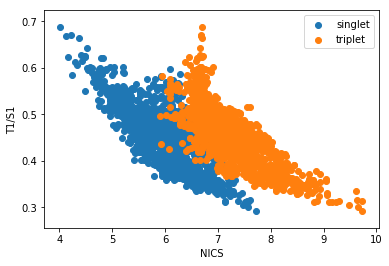

In [4]:
# plot data for the thiophene containing materials
points = df[df.title.str.contains('thio')] #
plt.scatter((points.nicss_six + points.nicss_five), points.tda_triplet/points.tda_singlet, label='singlet')
plt.scatter((points.nicst_six + points.nicst_five), points.tda_triplet/points.tda_singlet, label='triplet')
plt.legend()
ax = plt.gca()
ax.set_xlabel('NICS')
ax.set_ylabel('T1/S1')
plt.show()

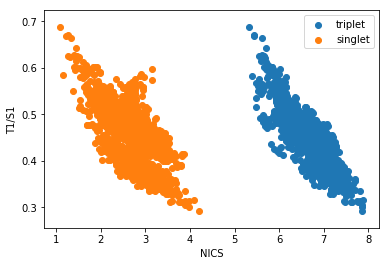

In [5]:
plt.scatter(points.nicst_five, points.tda_triplet/points.tda_singlet, label='triplet')
plt.scatter(points.nicss_five, points.tda_triplet/points.tda_singlet, label='singlet')
# plt.xlim([2, 9])
plt.legend()
ax = plt.gca()
ax.set_xlabel('NICS')
ax.set_ylabel('T1/S1')

In [6]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Construct the columns for the different powers of x
def get_r2_statsmodels(x, y, k=1):
    xpoly = np.column_stack([x**i for i in range(k+1)])    
    return sm.OLS(y, xpoly).fit().rsquared

get_r2_statsmodels(points.nicst_five, points.tda_ratio)


/home/alex/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


0.7405229246849645

In [7]:
import scipy
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(points.nicst_five, points.tda_ratio)
r_value ** 2

0.74052292468496428

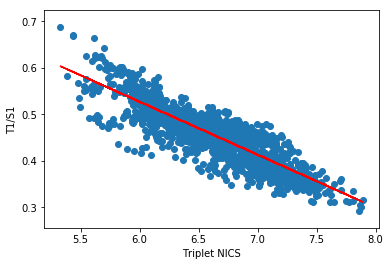

In [8]:
import numpy as np
fit = np.polyfit(points.nicst_five, points.tda_ratio, 1)
fit_fn = np.poly1d(fit)

plt.scatter(points.nicst_five, points.tda_triplet/points.tda_singlet)
plt.plot(points.nicst_five, fit_fn(points.nicst_five), c='r', label='linear regression')

# plt.xlim([2, 9])

ax = plt.gca()
ax.set_xlabel('Triplet NICS')
ax.set_ylabel('T1/S1')

## Phenyl subsitutent data

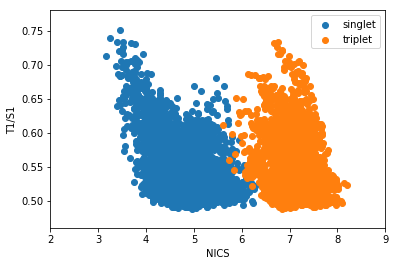

In [9]:
# plot data for the benzene containing materials
# '~' acts as a not for boolean data
points = df[~df.title.str.contains('thio') & (df.nx != 4) & (df.ny != 5)]
# points = df[~df.title.str.contains('thio')]
plt.scatter((points.nicss_six + points.nicss_five), points.tda_triplet/points.tda_singlet, label='singlet')
plt.scatter((points.nicst_six + points.nicst_five), points.tda_triplet/points.tda_singlet, label='triplet')
plt.xlim([2, 9])
plt.legend()
ax = plt.gca()
ax.set_xlabel('NICS')
ax.set_ylabel('T1/S1')

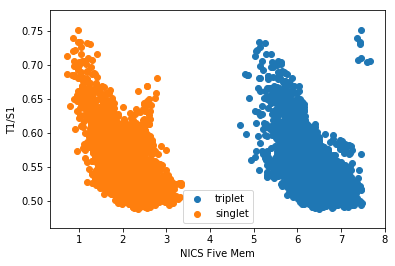

In [10]:
# plt.scatter(((points.nicst_five/points.nicss_five) + 
#               points.), points.tda_triplet/points.tda_singlet, label='triplet/singlet')
plt.scatter(points.nicst_five, points.tda_triplet/points.tda_singlet, label='triplet')
plt.scatter(points.nicss_five, points.tda_triplet/points.tda_singlet, label='singlet')
plt.legend()
ax = plt.gca()
ax.set_xlabel('NICS Five Mem')
ax.set_ylabel('T1/S1')

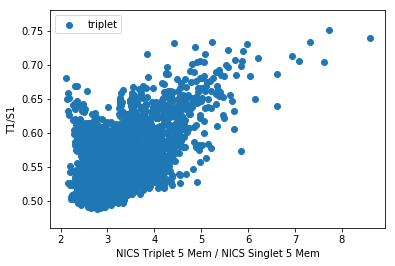

In [11]:
plt.scatter(points.nicst_five/points.nicss_five, points.tda_triplet/points.tda_singlet, label='triplet')
# plt.scatter(points.nicss_six, points.tda_triplet/points.tda_singlet, label='singlet')
plt.legend()
# plt.xlim([1.5, 4])
ax = plt.gca()
ax.set_xlabel('NICS Triplet 5 Mem / NICS Singlet 5 Mem')
ax.set_ylabel('T1/S1')

(0, 2)

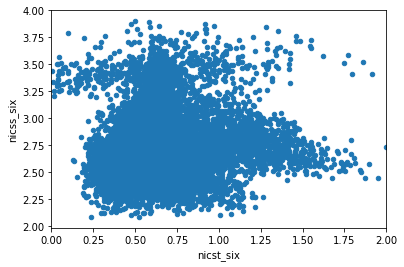

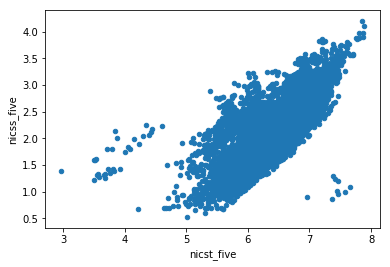

In [12]:
ax = df.plot(kind='scatter', x='nicst_six', y='nicss_six')
df.plot(kind='scatter', x='nicst_five', y='nicss_five')
ax.set_xlim([0, 2])

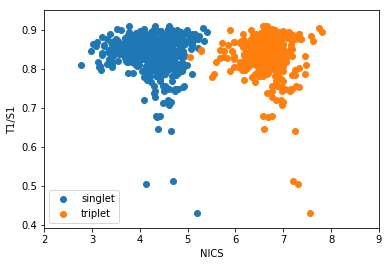

In [13]:
# Nitrogen on X4 and Y5 (adjacent) means v. high T1/S1 ratio 
points = df[~df.title.str.contains('thio') & (df.nx == 4) & (df.ny == 5)]
# points = df[~df.title.str.contains('thio')]
plt.scatter((points.nicss_six + points.nicss_five), points.tda_triplet/points.tda_singlet, label='singlet')
plt.scatter((points.nicst_six + points.nicst_five), points.tda_triplet/points.tda_singlet, label='triplet')
plt.xlim([2, 9])
plt.legend()
ax = plt.gca()
ax.set_xlabel('NICS')
ax.set_ylabel('T1/S1')

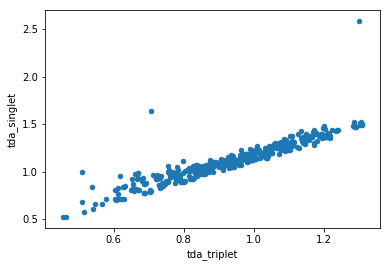

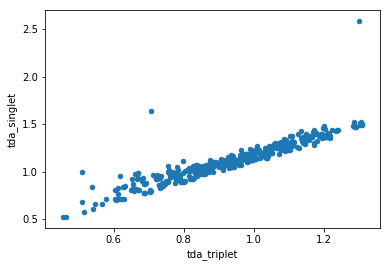

In [14]:
points = df[~df.title.str.contains('thio') & (df.nx == 4) & (df.ny == 5)]
# points = df[df.title.str.contains('thio')] #
points.plot(kind='scatter', x='tda_triplet', y='tda_singlet')
# points = df[~df.title.str.contains('thio')] #
points.plot(kind='scatter', x='tda_triplet', y='tda_singlet')

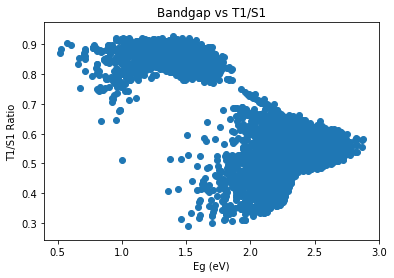

In [19]:

plt.scatter(df.tda_singlet, df.tda_triplet/df.tda_singlet, label='triplet')
ax = plt.gca()
ax.set(title='Bandgap vs T1/S1', xlabel='Eg (eV)', ylabel='T1/S1 Ratio')


In [16]:
df[(df.tda_singlet > 2.2) & (df.tda_triplet < 1) & (df.tda_ratio < 0.45) & (df.nx == 2)]

,nicss_five_ring_above,nicss_five_ring_below,nicss_six_ring_above,nicss_six_ring_below,nicst_five_ring_above,nicst_five_ring_below,nicst_six_ring_above,nicst_six_ring_below,nx,ny,...,title,x_sub,y_sub,z_sub,nicss_five,nicss_six,nicst_five,nicst_six,td_ratio,tda_ratio
8941,1.94425,3.28630,2.91120,4.33790,5.82470,6.49310,0.78660,0.50025,2.0,NaN,...,ciba_thiol_nx-2_ny-_x-hydroxyl_y-amine_z-,hydroxyl,amine,None,2.615275,3.624550,6.158900,0.643425,0.430677,0.449953
8952,2.18420,3.46440,2.69620,4.20900,6.26775,6.94030,0.70055,0.71945,2.0,NaN,...,ciba_thiol_nx-2_ny-_x-fluoro_y-fluoro_z-,fluoro,fluoro,None,2.824300,3.452600,6.604025,0.710000,0.411451,0.434435
8953,2.30855,3.60000,2.93260,4.31745,6.43480,7.10885,0.40730,0.89975,2.0,NaN,...,ciba_thiol_nx-2_ny-_x-fluoro_y-chloro_z-,fluoro,chloro,None,2.954275,3.625025,6.771825,0.653525,0.411647,0.435016
8954,2.40760,3.63590,2.69350,4.42695,6.51265,7.13535,0.63645,1.00770,2.0,NaN,...,ciba_thiol_nx-2_ny-_x-fluoro_y-bromo_z-,fluoro,bromo,None,3.021750,3.560225,6.824000,0.822075,0.410841,0.434593
8961,2.35120,3.66185,2.85360,4.26810,6.49925,7.22055,0.50235,0.83250,2.0,NaN,...,ciba_thiol_nx-2_ny-_x-chloro_y-chloro_z-,chloro,chloro,None,3.006525,3.560850,6.859900,0.667425,0.423499,0.446832
8962,2.36905,3.59560,2.74635,4.46300,6.50925,7.10640,0.63950,1.01165,2.0,NaN,...,ciba_thiol_nx-2_ny-_x-chloro_y-bromo_z-,chloro,bromo,None,2.982325,3.604675,6.807825,0.825575,0.422974,0.446522
8976,2.22705,3.50830,2.61940,4.14940,6.33635,7.04460,0.69165,0.76175,2.0,NaN,...,ciba_thiol_nx-2_ny-_x-_y-fluoro_z-,None,fluoro,None,2.867675,3.384400,6.690475,0.726700,0.413830,0.437199
8977,2.46515,3.72065,2.78540,4.21780,6.59675,7.30565,0.45640,0.91570,2.0,NaN,...,ciba_thiol_nx-2_ny-_x-_y-chloro_z-,None,chloro,None,3.092900,3.501600,6.951200,0.686050,0.412825,0.436787
8978,2.40800,3.67730,2.70030,4.26550,6.53960,7.26220,0.52090,0.94990,2.0,NaN,...,ciba_thiol_nx-2_ny-_x-_y-bromo_z-,None,bromo,None,3.042650,3.482900,6.900900,0.735400,0.412720,0.436825
